
# Project: Now Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This is a database of patients appointment history. The records of when patients made appointment and then either show up or not show. There are number of features that can affect no show. So, here we will analyze what features directly affect no show.

In [121]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [122]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

Going to check following important factors
1. Duplicated rows
2. Data types check
3. Logically correct values in features

### General Properties

In [123]:
#check which columns have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [124]:
df.shape

(110527, 14)

In [125]:
#check for duplicates in the data
sum(df.duplicated())

0

In [126]:
#change column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

Since Ages cannot be negative; we have to remove this row

In [127]:
#data integrity check
incorrect_data = df.query('age < 0')
incorrect_data

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Inspect Datatypes

In [128]:
type(df['gender'][0])

str

In [129]:
type(df['scheduledday'][0])

str

In [130]:
type(df['neighbourhood'][0])

str

### Data Cleaning
1. Going to remove row with negative age field.
2. Converting scheduleday & appointmentday data type to datetime.
3. Rename no-show column to no_show 

4.Change no-show data from yes ==> 1 and No ==> 0

##### 1. Removing negative age rows

In [131]:
incorrect_age = df.query('age < 0').index
df.drop(incorrect_age, inplace=True)

Verify is there any age in negative

In [132]:
incorrect_data = df.query('age < 0')
incorrect_data
#df.shape

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


##### 2. Coverting scheduleday datatype from to datetime

In [133]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

converting appointmentday datatype from int to datetime

In [134]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null float64
appointmentid     110526 non-null int64
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns, UTC]
appointmentday    110526 non-null datetime64[ns, UTC]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no-show           110526 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [136]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 3. change name of column from no-show to no_show

In [137]:
df.rename(columns={'no-show': 'no_show'}, inplace=True)

##### 4. Change no-show data from yes ==> 1 and No ==> 0

In [138]:
df['no_show'].replace({'No':0, 'Yes':1}, inplace=True)

Verifying now_show changes

In [139]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

1. Does Patients show depends on SMS received?
2. Does Patient show depends on gender?
3. Does Patient show depends on alcoholism?
4. Does patient show depends on scholarship?
5. Does Patient show depends on hipertension?
6. Does Patient show depends on age group?

### 1 Does Patient Show depends on SMS received?

In [140]:
df.groupby('sms_received')['no_show'].mean()

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64

Viewing Relationship between no_show and sms_received via graph

Text(0.5, 1.0, 'Relationship between SMS received and no show')

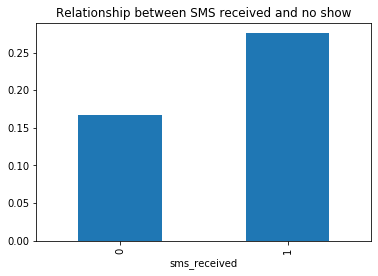

In [141]:
df.groupby('sms_received')['no_show'].mean().plot.bar()
plt.title('Relationship between SMS received and no show')

### 2. Does Patient show depends on gender?

In [142]:
df.groupby('gender')['no_show'].mean()

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64

Text(0.5, 1.0, 'Relationship between Gender and no show')

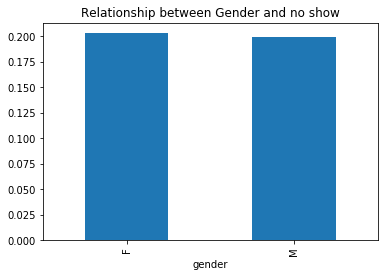

In [143]:
df.groupby('gender')['no_show'].mean().plot.bar()
plt.title('Relationship between Gender and no show')

### 3. Does Patient show depends on alcoholism?

In [144]:
df.groupby('alcoholism')['no_show'].mean()

alcoholism
0    0.201948
1    0.201488
Name: no_show, dtype: float64

Text(0.5, 1.0, 'Relationship between Alcholism and no show')

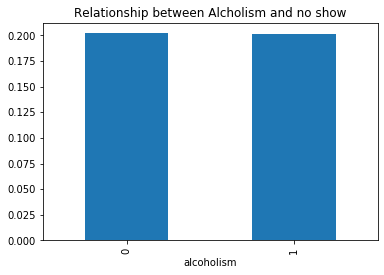

In [145]:
df.groupby('alcoholism')['no_show'].mean().plot.bar()
plt.title('Relationship between Alcholism and no show')

### 4. Does patient show depends on scholarship?

In [146]:
df.groupby('scholarship')['no_show'].mean() 

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64

Text(0.5, 1.0, 'Relationship between scholarship and no show')

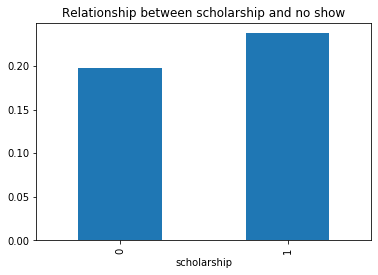

In [147]:
df.groupby('scholarship')['no_show'].mean().plot.bar()
plt.title('Relationship between scholarship and no show')

### 5. Does Patient show depends on hipertension?

Text(0.5, 1.0, 'Relationship between Hipertension and no show')

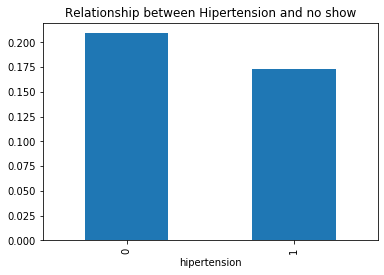

In [148]:
df.groupby('hipertension')['no_show'].mean().plot.bar()
plt.title('Relationship between Hipertension and no show')

### 6. Does Patient show depends on age group?

Text(0, 0.5, 'No of Patients')

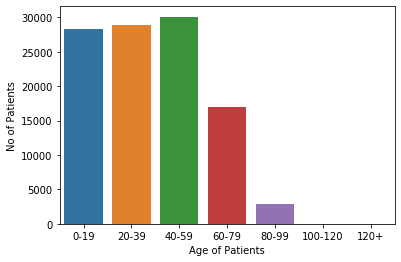

In [150]:
age_bins = [0,20,40,60,80,100,120,140]
age_bins_name = ['0-19','20-39','40-59','60-79','80-99','100-120','120+']
age_cat = pd.cut(df.age, bins = age_bins, labels=age_bins_name)

sns.countplot(x=age_cat)
plt.xlabel('Age of Patients')
plt.ylabel('No of Patients')
#df.groupby('age')['no_show'].mean().plot.bar()

Text(0, 0.5, 'Count')

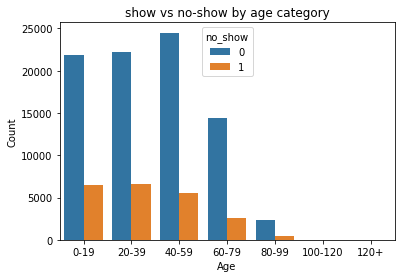

In [151]:
sns.countplot(x=age_cat, hue = df.no_show, data = df).set_title('show vs no-show by age category');
plt.xlabel('Age')
plt.ylabel('Count')

<a id='conclusions'></a>
## Conclusions

Sending SMS to the patients did not increase the chance of patient show up.  

We also saw that gender and alcholism do not significantly impact patient show up.

The patients having scholarship have large tendency to miss appointment.

We have also see that age group 0-39 are mostly likely miss appointment as compared to 40+ people